# Cardivascular Disease Analysis

## Heart Disease Dataset

### EN :
This heart disease dataset was collected from a multispecialty hospital in India. It contains 12 features and 1000 subjects, making it a valuable resource for research and machine learning applications, especially for early-stage heart disease detection.

### TR :
Bu kalp hastalığı veri seti, Hindistan'daki bir çok branşlı hastaneden toplanmıştır. 1000 kişi ve 12 özelliği içermektedir. Özellikle erken evre kalp hastalığı tespiti ve makine öğrenimi modelleri geliştirmek için önemli bir kaynak oluşturmaktadır.


### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset

In [3]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### Checking for Missing Values

In [4]:
data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


#### EN :
  This generates histograms for the numerical variables in the dataset to visualize their distribution.
  
#### TR :
  Veri kümesindeki sayısal değişkenlerin dağılımlarını görselleştirmek için histogramlar oluşturulur.

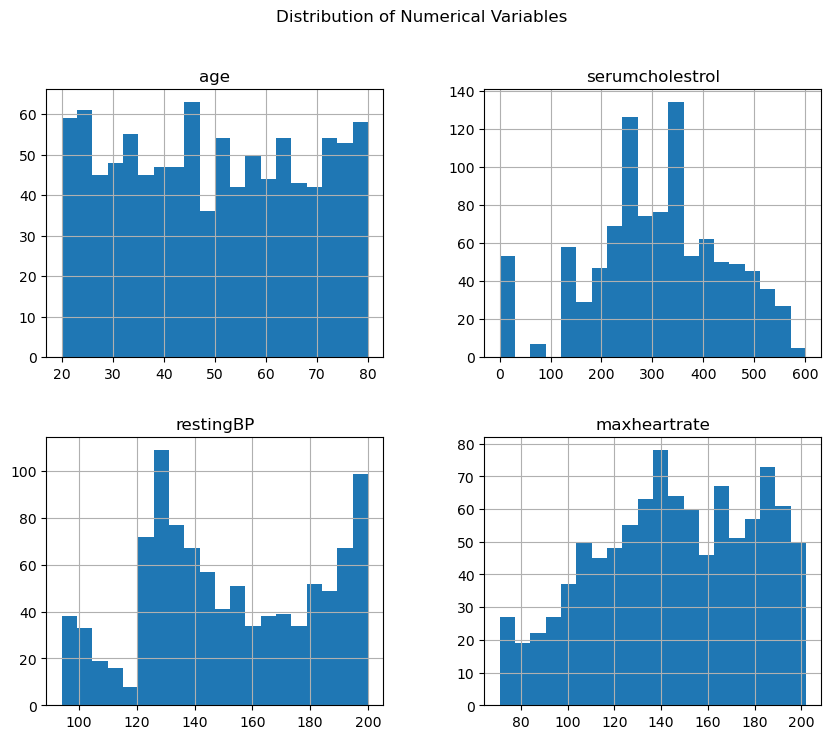

In [6]:
data[['age', 'serumcholestrol', 'restingBP', 'maxheartrate']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

#### EN : 
This generates a heatmap to visualize the correlation matrix of the dataset's variables. It displays the strength of the relationships between different features, helping to identify how they influence each other.

---

#### TR : 
Veri kümesinin değişkenleri arasındaki korelasyon matrisini görselleştirmek için bir ısı haritası oluşturulur. Korelasyon matrisinde özelliklerin birbirini etkileme büyüklüklerini görüntüleyerek, farklı özelliklerin birbirini nasıl etkilediğini belirlemeye yardımcı olur.


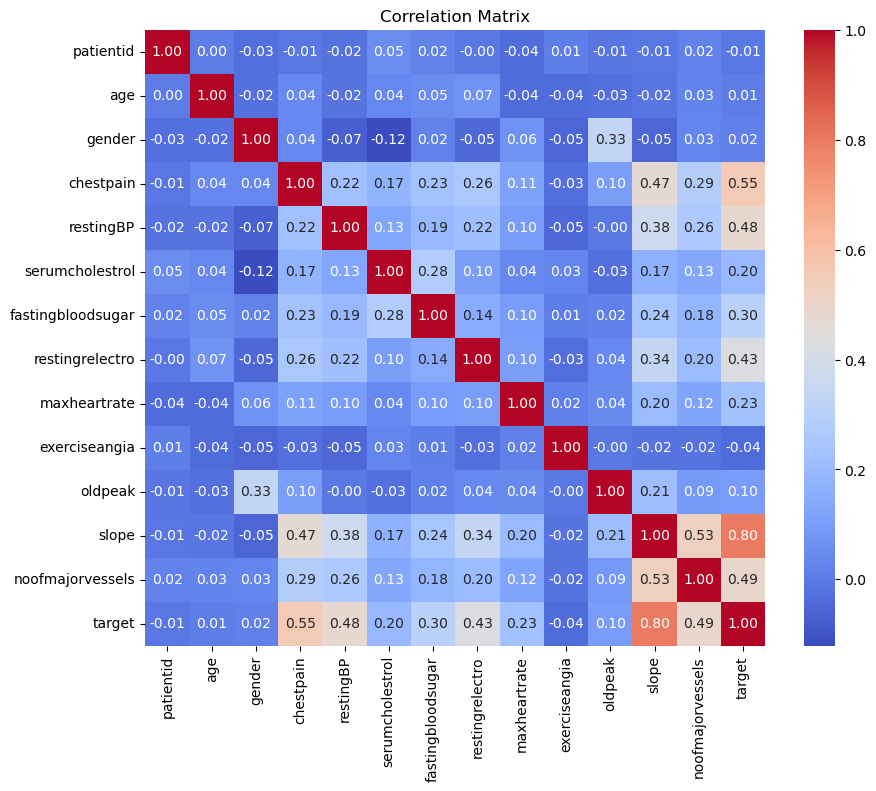

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### EN :
This generates a count plot to visualize the relationship between gender and heart disease. It uses the 'target' variable to show the distribution of heart disease cases across different genders. 

 --- 

#### TR : 
Cinsiyet ve kalp hastalığı arasındaki ilişkiyi görselleştirmek için bir sayım grafiği oluşturulur. 'target' değişkeni kullanılarak farklı cinsiyetlerdeki kalp hastalığı vakalarının dağılımı gösterilir.

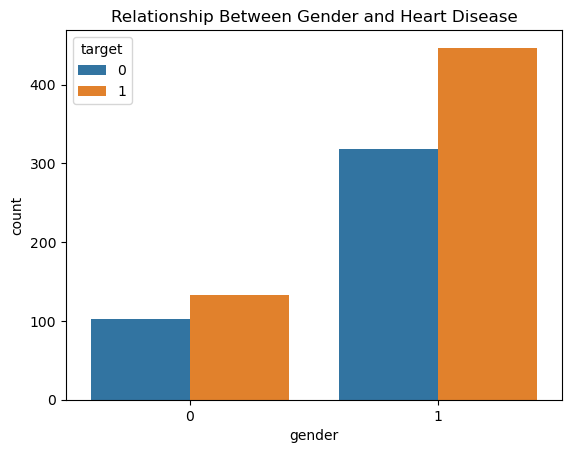

In [8]:
sns.countplot(data = data, x = 'gender', hue = 'target')
plt.title('Relationship Between Gender and Heart Disease')
plt.show()

#### Relationship Between Fasting Blood Sugar and Heart Disease - EN :

This generates a count plot to visualize the relationship between fasting blood sugar levels and heart disease. It uses the 'target' variable to show the distribution of heart disease cases across different fasting blood sugar levels.

---

#### Açlık Kan Şekeri ve Kalp Hastalığı Arasındaki İlişki - TR :

Açlık kan şekeri seviyeleri ile kalp hastalığı arasındaki ilişkiyi görselleştirmek için bir sayım grafiği oluşturur. 'target' değişkenini kullanarak farklı açlık kan şekeri seviyelerinde kalp hastalığı vakalarının dağılımını gösterir.


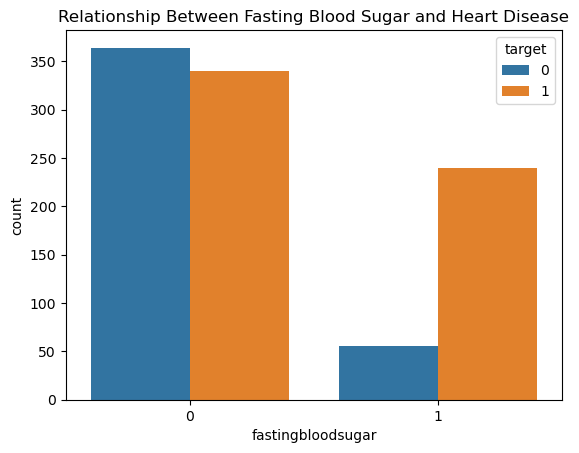

In [9]:
sns.countplot(data = data, x = 'fastingbloodsugar', hue = 'target')
plt.title('Relationship Between Fasting Blood Sugar and Heart Disease')
plt.show()

In [10]:
chestPain = data['chestpain'].value_counts()
transactions = chestPain.index
quantity = chestPain.values

figure = px.pie(data,
                names = transactions,
                values = quantity,
                hole = 0.5,
                title = 'Chest Pain Types')
figure.show()

#### Chest Pain Types and Values

- **Value 0**: Typical Angina
- **Value 1**: Atypical Angina
- **Value 2**: Non-Anginal Pain
- **Value 3**: Asymptomatic

---

#### Göğüs Ağrısı Türleri ve Değerler

- **Değer 0**: Tipik Anjina
- **Değer 1**: Atipik Anjina
- **Değer 2**: Anjinal Olmayan Ağrı
- **Değer 3**: Asemptomatik


In [11]:
restingElectro = data['restingrelectro'].value_counts()
transactions = restingElectro.index
quantity = restingElectro.values

figure = px.pie(data,
                names = transactions,
                values = quantity,
                hole = 0.5,
                title = 'Resting Electrocardiogram Results ')
figure.show()

#### ECG Results and Values

- **Value 0**: Normal
- **Value 1**: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- **Value 2**: Showing probable or definite left ventricular hypertrophy by Estes' criteria

---

#### EKG Sonuçları ve Değerler

- **Değer 0**: Normal
- **Değer 1**: ST-T dalga anormalliğine sahip (T dalga inversiyonları ve/veya ST yükselmesi veya > 0.05 mV depresyonu)
- **Değer 2**: Estes kriterlerine göre olası veya kesin sol ventrikül hipertrofisi gösteren


In [12]:
slope = data['slope'].value_counts()
transactions = slope.index
quantity = slope.values

figure = px.pie(data,
                names = transactions,
                values = quantity,
                hole = 0.5,
                title = 'Slope of the peak exercise ST segment')
figure.show()

#### Slope of the Peak Exercise ST Segment Values
- **Value 0**: Undefined
- **Value 1**: Upsloping
- **Value 2**: Flat
- **Value 3**: Downsloping

---

#### Egzersiz ST Segmenti Eğimi Değerleri
- **Değer 0**: Tanımlanmamış
- **Değer 1**: Yükselen
- **Değer 2**: Düz
- **Değer 3**: Düşen


---
---

#### Relationship Between Resting Blood Pressure and Heart Disease - EN :

This generates a box plot to visualize the relationship between resting blood pressure and heart disease. It compares the resting blood pressure levels across two categories: no heart disease (0) and heart disease present (1).

---

#### İstirahat Kan Basıncı ve Kalp Hastalığı Arasındaki İlişki - TR :

İstirahat kan basıncı ile kalp hastalığı arasındaki ilişkiyi görselleştirmek için bir kutu grafiği oluşturulur. İstirahat kan basıncı seviyelerini iki kategori arasında karşılaştırılır: kalp hastalığı yok (0) ve kalp hastalığı var (1).


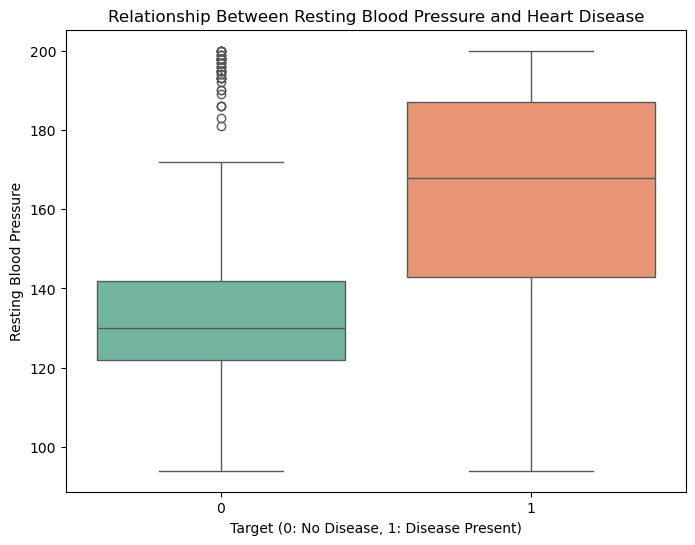

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='restingBP', data=data, palette='Set2')
plt.title('Relationship Between Resting Blood Pressure and Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease Present)')
plt.ylabel('Resting Blood Pressure')
plt.show()

#### Relationship Between Serum Cholesterol and Heart Disease - EN :

This generates a box plot to visualize the relationship between serum cholesterol levels and heart disease. It compares serum cholesterol levels across two categories: no heart disease (0) and heart disease present (1).

---

#### Serum Kolesterol ve Kalp Hastalığı Arasındaki İlişki - TR :

Serum kolesterol seviyeleri ile kalp hastalığı arasındaki ilişkiyi görselleştirmek için bir kutu grafiği oluşturulur. Serum kolesterol seviyelerini iki kategori arasında karşılaştırılır: kalp hastalığı yok (0) ve kalp hastalığı var (1).


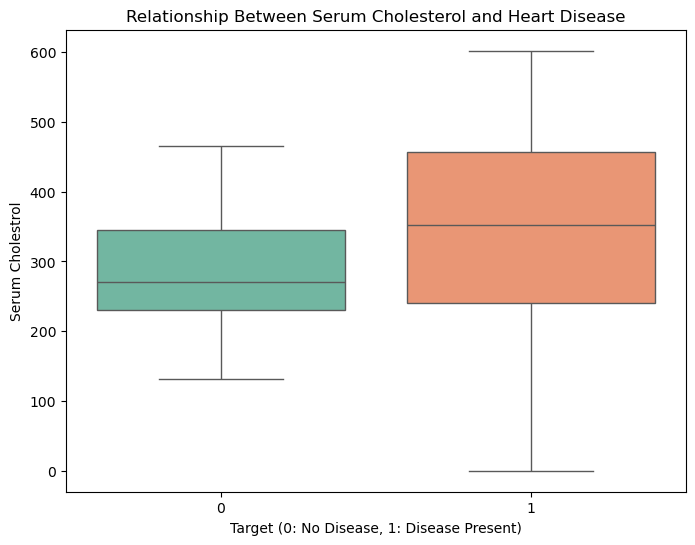

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='serumcholestrol', data=data, palette='Set2')
plt.title('Relationship Between Serum Cholesterol and Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease Present)')
plt.ylabel('Serum Cholestrol')
plt.show()

#### Relationship Between Max Heart Rate and Heart Disease - EN :

This generates a box plot to visualize the relationship between maximum heart rate achieved and heart disease. It compares the maximum heart rate levels across two categories: no heart disease (0) and heart disease present (1).

---

#### Maksimum Kalp Atış Hızı ve Kalp Hastalığı Arasındaki İlişki - TR :

Maksimum kalp atış hızı ile kalp hastalığı arasındaki ilişkiyi görselleştirmek için bir kutu grafiği oluşturuldu. Maksimum kalp atış hızı seviyelerini iki kategori arasında karşılaştırıldı: kalp hastalığı yok (0) ve kalp hastalığı var (1).


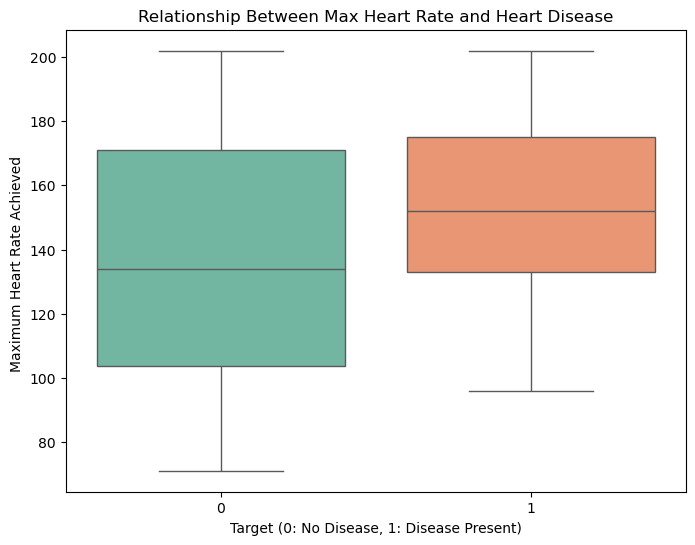

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='maxheartrate', data=data, palette='Set2')
plt.title('Relationship Between Max Heart Rate and Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease Present)')
plt.ylabel('Maximum Heart Rate Achieved ')
plt.show()

#### Feature and Target Arrays - EN :

The relevant features were assigned to variable X and the target to variable y for model training.

---

#### Özellik ve Hedef Dizileri - TR :

Model eğitimi için ilgili özellikler X değişkenine ve hedef y değişkenine tanımlandı.


In [16]:
X = np.array(data[['gender', 'age', 'exerciseangia', 'chestpain', 'restingBP','serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
                   'oldpeak', 'slope', 'noofmajorvessels']])
y = np.array(data[['target']])

#### Train-Test Split - EN :

The data is split into training and testing sets. The training set (X_train, y_train) will be used to train the model, while the testing set (X_test, y_test) will be used to evaluate its performance. The split is 75% training data and 25% testing data.

---

#### Eğitim-Test Ayrımı - TR :

Veri, eğitim ve test setlerine bölünmüştür. Eğitim seti (X_train, y_train) modeli eğitmek için kullanılırken, test seti (X_test, y_test) performansını değerlendirmek için kullanılır. Ayrım, %75 eğitim verisi ve %25 test verisi şeklindedir.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Hyperparameter Tuning with GridSearchCV - EN :

This tunes the hyperparameters for an SVM classifier using GridSearchCV. It searches through the specified parameter grid with cross-validation to find the best parameters (`C` and `gamma`) that maximize the model's accuracy. The results are printed out, showing the best hyperparameters and the corresponding accuracy.

---

#### GridSearchCV ile Hiperparametre Ayarlaması TR :

 GridSearchCV kullanılarak SVM sınıflandırıcısı için hiperparametreleri ayarlanırr. Çapraz doğrulama ile belirtilen parametre gridinde arama yaparak modelin doğruluğunu en üst düzeye çıkaran en iyi parametreler (`C` ve `gamma`) bulunur. Sonuçlar, en iyi hiperparametreler ve buna karşılık gelen doğruluk gösterilerek yazdırılır.


In [18]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svc = SVC()

svc_cv = GridSearchCV(estimator = svc, param_grid = parameters, cv = 10)
svc_cv.fit(X_train,y_train)

print('Tuned Hyper Parameters : ', svc_cv.best_params_)
print('Accuracy : ', svc_cv.best_score_)

Tuned Hyper Parameters :  {'C': 1, 'gamma': 0.001}
Accuracy :  0.8133333333333332


#### Model Training with Best Parameters - EN :

The model is trained using the best hyperparameters found from GridSearchCV. These parameters are applied to the SVC classifier to fit the training data.

---

#### En İyi Parametrelerle Model Eğitimi - TR :

Model, GridSearchCV ile bulunan en iyi hiperparametreler kullanılarak eğitilir. Bu parametreler, SVC sınıflandırıcısına uygulanarak eğitim verisi kullanılır.


In [19]:
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [20]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.848
